In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
!pip install ipython-sql


In [69]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [70]:
%sql sqlite://

In [71]:
from google.colab import files
uploaded = files.upload()


Saving Aemf1.csv to Aemf1 (1).csv


In [72]:
import pandas as pd

df = pd.read_csv('/content/Aemf1.csv')  # replace with your file name
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [74]:
import sqlite3

# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Push the dataframe into a SQL table
df.to_sql('airbnb', conn, index=False, if_exists='replace')

41714

In [75]:
#1: What is the average price in each city?
query = '''
SELECT city, ROUND(AVG(price),2) AS average_price
FROM airbnb
GROUP BY city
ORDER BY average_price DESC
LIMIT 10
'''

result = pd.read_sql_query(query, conn)
result.head()


,City,average_price
0,Amsterdam,573.11
1,Paris,392.53
2,Barcelona,293.75
3,Berlin,244.58
4,Vienna,241.58


In [76]:
#2: Which room type is most common overall?
query = '''
SELECT "Room Type", COUNT(*) count
FROM airbnb
GROUP BY "Room Type"
ORDER BY count DESC
'''
result = pd.read_sql_query(query, conn)
result.head()

,Room Type,count
0,Entire home/apt,28264
1,Private room,13134
2,Shared room,316


In [77]:
#3: What is the average guest satisfaction per city?
query = '''
SELECT city, ROUND(AVG("Guest Satisfaction"), 1) AS Avg_Satisfaction
FROM airbnb
GROUP BY city
ORDER BY avg_satisfaction DESC
'''
result = pd.read_sql_query(query, conn)
result.head()


,City,Avg_Satisfaction
0,Athens,95.0
1,Budapest,94.6
2,Amsterdam,94.5
3,Berlin,94.3
4,Vienna,93.7


In [79]:
#4: Which cities have the listings closest to the city center on average?
query = '''
SELECT city, ROUND(AVG("city center (km)"), 2) AS Avg_distance_to_center
FROM airbnb
GROUP BY city
ORDER BY avg_distance_to_center ASC
'''
result = pd.read_sql_query(query, conn)
result.head()


,City,Avg_distance_to_center
0,Athens,1.80
1,Budapest,1.87
2,Lisbon,1.97
3,Barcelona,2.12
4,Amsterdam,2.83


/tmp/ipython-input-95-374958920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg.index, y=city_avg.values, palette="Reds")


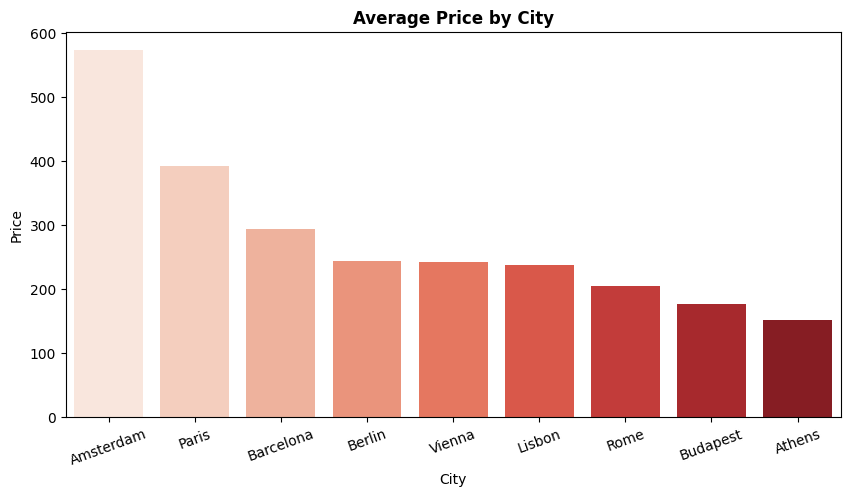

In [95]:
#Chart average price by city
city_avg = df.groupby("City")["Price"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=city_avg.index, y=city_avg.values, palette="Reds")
plt.title("Average Price by City", fontweight='bold')
plt.xticks(rotation=20)
plt.ylabel("Price")
plt.show()

In [96]:
# Key Insights & Recommendations

#Cities like Amsterdam and Paris offer premium stays but may benefit from more budget options.
#Locations closer to city centers are more expensive, but satisfaction isn't always higher. There's room for pricing strategy optimization.
